JEUX DE DONNEE SUR LES MALADIES CARDIO VASCULAIRES


---
**DESCRIPTION DU JEUX DE DONNEES** : Selon l'Organisation mondiale de la santé (OMS), l'accident vasculaire cérébral est la deuxième cause de décès dans le monde, responsable d'environ 11 % du total des décès.
Cet ensemble de données fournit des informations pertinentes sur le patient  en fonction de paramètres d'entrée tels que le sexe, l'âge, diverses maladies et le statut tabagique.

**OBJECTIF** : L'objectif de notre analyse sera de prédire si un patient est susceptible de subir un accident vasculaire cérébral.

- id :  identifiant unique
- gender:  « Homme », « Femme » ou « Autre »
- age  : âge du patient
- hypertension : 0 si le patient n'a pas d'hypertension, 1 si le patient a de l'hypertension

- heart_disease : 0 si le patient n'a aucune maladie cardiaque, 1 si le patient a une maladie cardiaque
- ever_married  : déja marié « Non » ou « Oui »
- work_type : « enfants », « Gouvernement », « Jamais_travaillé », « Privé » ou « Travailleur indépendant »
- Residence_type  : « Rural » ou « Urbain »
- avg_glucose_level : taux moyen de glucose dans le sang
- bmi : indice de masse corporelle
- smoking_status : « ancien fumeur », « n'a jamais fumé », « fume » ou « Inconnu »
- stroke  : 1 si le patient a eu un accident vasculaire cérébral ou 0 sinon

remarque : « Inconnu » dans smoking_status signifie que l'information n'est pas disponible pour ce patient

1. IMPORTATION DES LIBBRAIRIES NECESSAIRES

In [5]:
#pour le calcul
import numpy as np

#pour la manipulation des données
import pandas as pd

#pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#pour la distribution
from scipy.stats import shapiro

#pour l'encodage
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#equilibre des classes par surechantillonnage
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

#pour la mise a l'échelle
from sklearn.preprocessing import MinMaxScaler

#pour la divison du jeux de donnée
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

#pour la modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_fscore_support as score


import warnings
warnings.filterwarnings('ignore')

2. IMPORTATION DU JEUX DE DONNEE

In [6]:
data = pd.read_csv("C:/Users/HP/Documents/DATASCIENCE/base de donnees/healthcare-dataset-stroke-data.csv")

In [7]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#**3**. **ANALYSE** **EXPLORATOIRE** **DE LA BASE DE DONNEE**

A- INFORMATION GENERALE

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Ce jeux de donnée contient 5110 entrée,12 colonnes, dont 7 sont des variables quantitatives et 5 sont des valeurs qualitatives.

B- DESCRIPTION STATISTIQUE

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


D'après les résultats obtenus nous avons:
- age : l'age moyens des patients est de 43 ans; 25% des patients ont moins de 25 ans et 75% des patiens ont plus de 61 ans

- hypertension : 75% des variables sont nulles il ne sont donc pas hypertendu, le maximum est 1 et le minimum 0
- heart_disease : 75% des patients ne sont pas atteint de maladie cardiaque,la moyenne et la médiane sont proches.

- avg_glucose : Le taux moyens de glucose est élevé a 106.14,75% des patients ont un taux élevé de 114.09

- bmi: L'indice de masse corporelle est en moyenne 28.89,le minimum est 10.30 et le maximum est 97.6


In [10]:
data.describe(include = 'O').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


gender :
ever_married:
work_type :
Residence_type :
smoking_status

1.   List item
2.   List item



C - IDENTIFICATION DES VARIABLES NON NULS

In [11]:
percent = data.isnull().sum()
effet = (percent/len(data))*100
pd.concat([percent,effet],keys=["POURCENTAGE","EFFECTIF"],axis= 1)

,POURCENTAGE,EFFECTIF
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


In [12]:
#Imputation des quantitatives par la moyenne

data['bmi'].fillna(data['bmi'].median(),inplace=True)

In [13]:
data['bmi'].isnull().sum()

np.int64(0)

D - Identification des doublons

In [14]:
data.duplicated().value_counts()

False    5110
Name: count, dtype: int64

# 4. ANALYSE UNIVARIEE

4_1. VARIABLES QUANTITATIVES

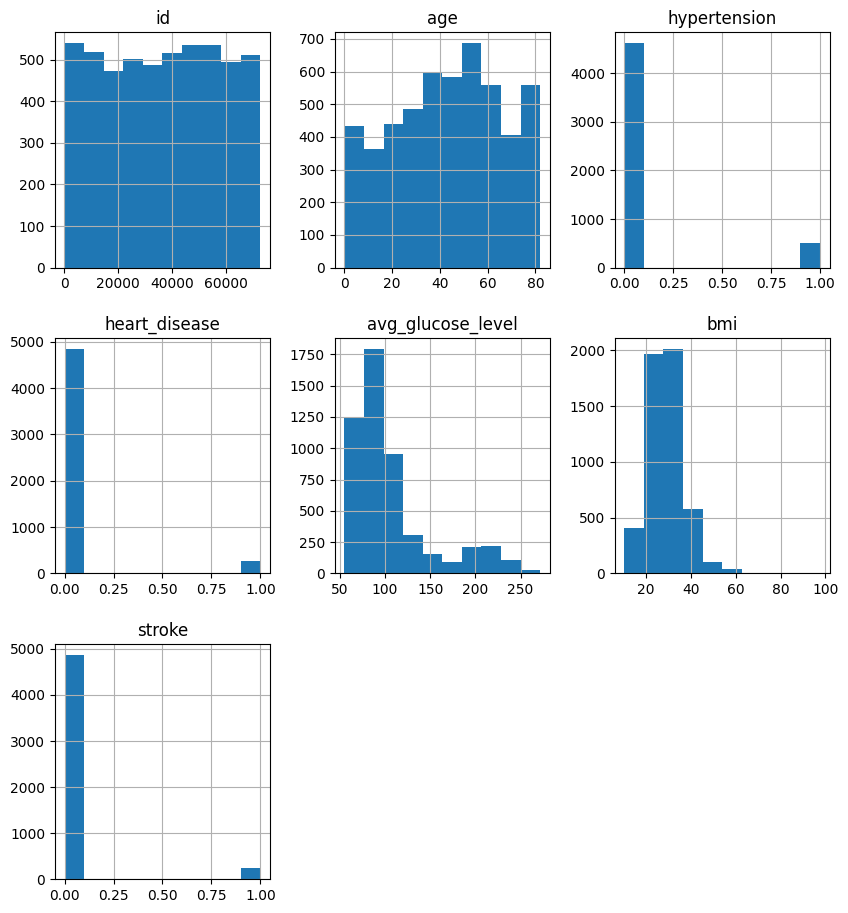

In [15]:
# DISTRIBUTIO DES VARIABLES
data.hist(figsize=(10,11))

plt.show()

In [16]:
# Récupération des variables numériques
data_quant = data.select_dtypes(exclude='object')

# Extraction des colonnes numeriques que vous voulez tester
valeurs = data_quant.columns.tolist() #data['valeur']

for col in valeurs :

# Effectuer le test de Shapiro-Wilk
  stat, p_value = shapiro(data_quant[valeurs])

  print(f'Statistique de test {col} =', stat)
  print(f'P-value {col} =', p_value)

# Interprétation des résultats
  alpha = 0.05
  if p_value > alpha:
      print(f"L'échantillon de {col} semble provenir d'une distribution normale (ne pas rejeter H0)")
  else:
      print(f"L'échantillon de {col} ne semble pas provenir d'une distribution normale (rejeter H0)")


Statistique de test id = 0.3951736107848731
P-value id = 4.364971661203801e-138
L'échantillon de id ne semble pas provenir d'une distribution normale (rejeter H0)
Statistique de test age = 0.3951736107848731
P-value age = 4.364971661203801e-138
L'échantillon de age ne semble pas provenir d'une distribution normale (rejeter H0)
Statistique de test hypertension = 0.3951736107848731
P-value hypertension = 4.364971661203801e-138
L'échantillon de hypertension ne semble pas provenir d'une distribution normale (rejeter H0)
Statistique de test heart_disease = 0.3951736107848731
P-value heart_disease = 4.364971661203801e-138
L'échantillon de heart_disease ne semble pas provenir d'une distribution normale (rejeter H0)
Statistique de test avg_glucose_level = 0.3951736107848731
P-value avg_glucose_level = 4.364971661203801e-138
L'échantillon de avg_glucose_level ne semble pas provenir d'une distribution normale (rejeter H0)
Statistique de test bmi = 0.3951736107848731
P-value bmi = 4.3649716612038

Au vu de l'analyse de la distribution statistiques des variables numériques. Aucune variable ne suit une lois normale.

In [17]:
#data[['hypertension','heart_disease','stroke']]= data[['hypertension','heart_disease','stroke']].astype(object)

In [18]:
#print(data[['hypertension','heart_disease','stroke']].dtypes)

In [19]:
data_quant= data_quant.drop('id',axis=1)

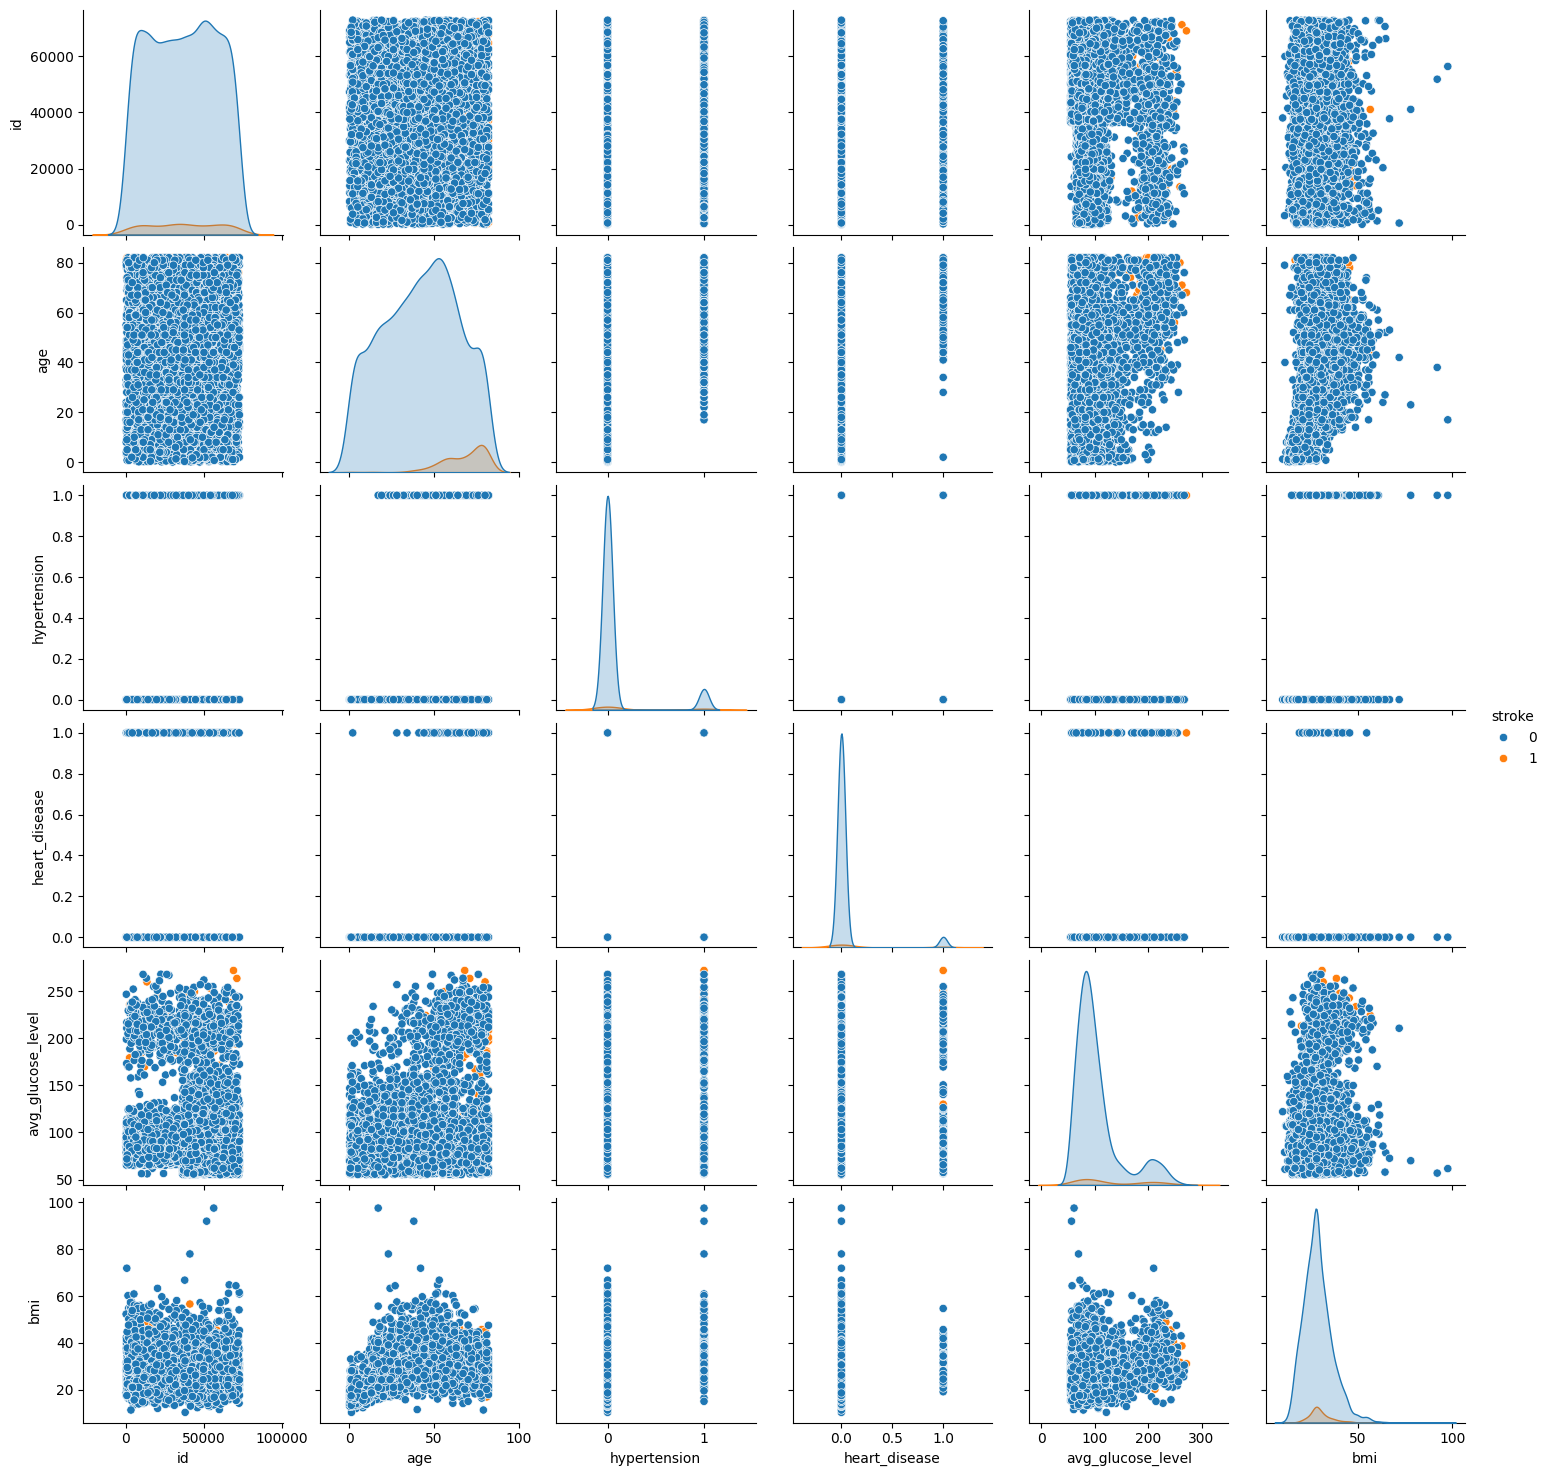

In [20]:
#correlation entre les différentes variables
#plt.figure(figsize=(10,8))
#sns.heatmap(data_quant, annot=True, cmap='coolwarm', cbar=True)

sns.pairplot(data,hue='stroke')

plt.show()

In [21]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


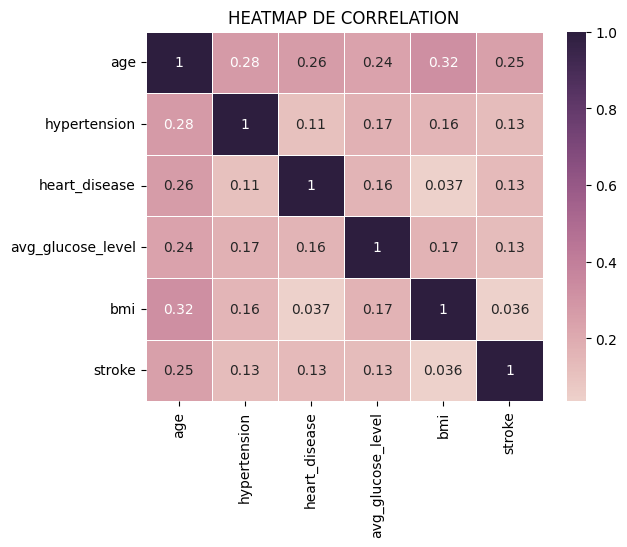

In [22]:
# Génération de la heatmap de corrélation
sns.heatmap(data_quant.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True,linewidths=0.5)
plt.title('HEATMAP DE CORRELATION')
plt.show()

4.2) ANALYSE DES VARIABLES CATEGORIELLES

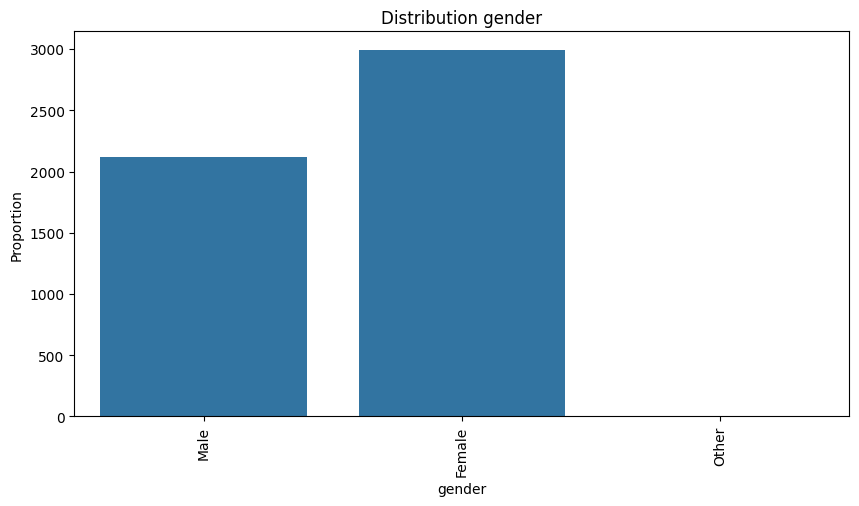

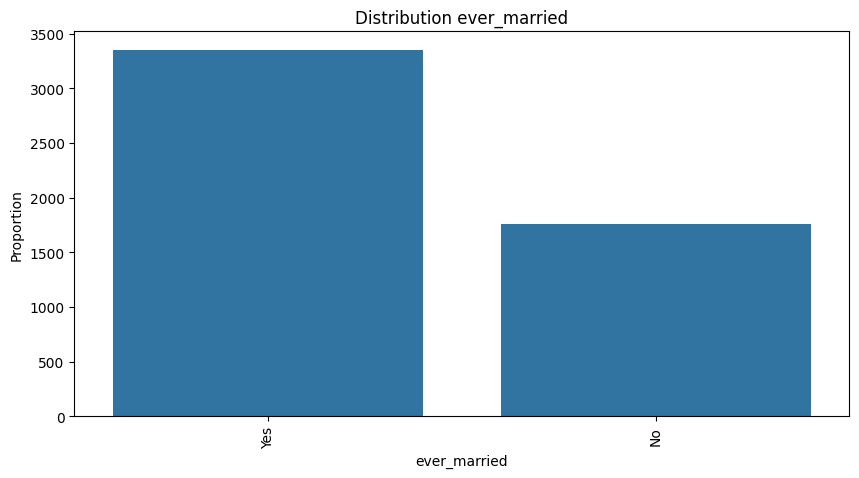

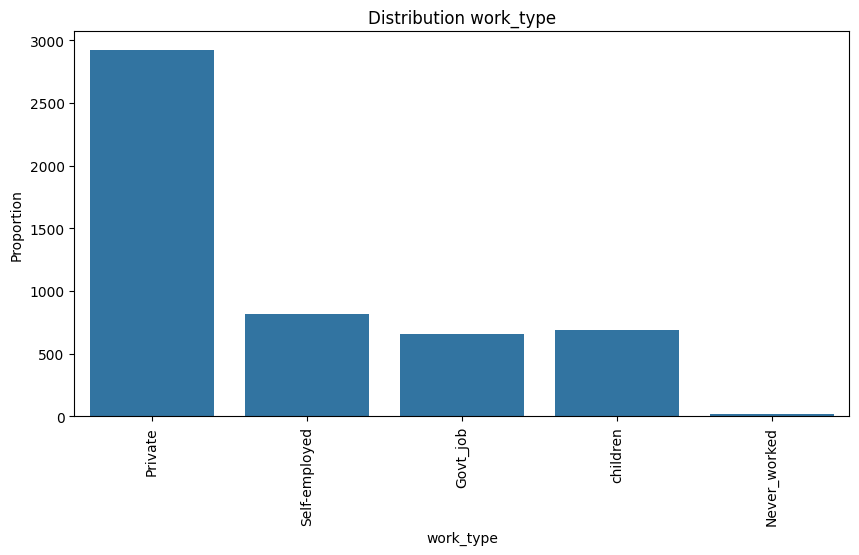

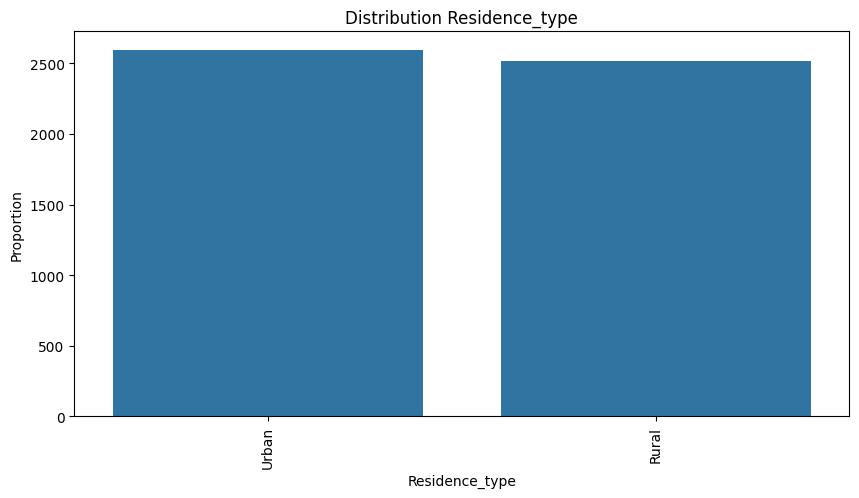

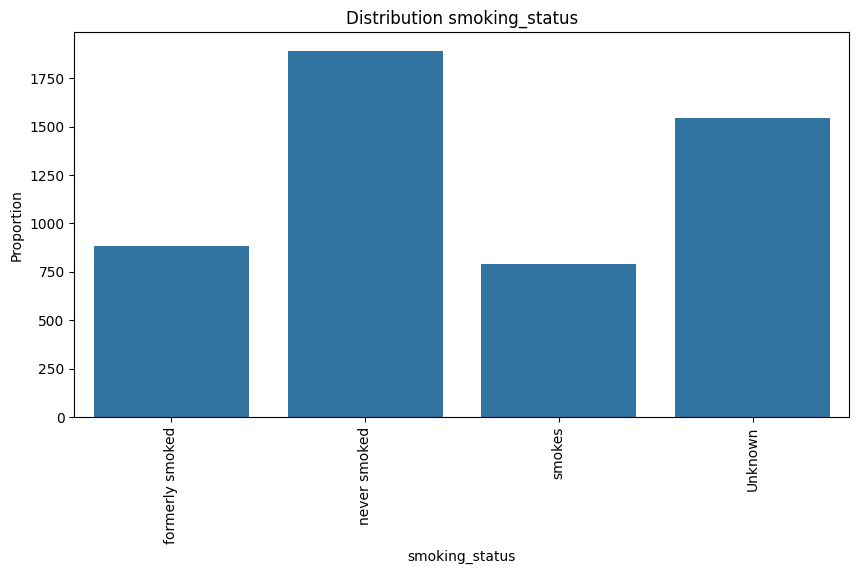

In [23]:
data_qual = data.select_dtypes(include='O')
vars = data_qual.columns.tolist()
for col in vars:
    plt.figure(figsize=(10,5))
    sns.countplot(x=data_qual[col])
    plt.title("Distribution "+ str(col))
    plt.xlabel(str(col))
    plt.xticks(rotation=90)
    plt.ylabel("Proportion")


5- ANALYSE BIVARIEE

In [24]:
df = data.copy()

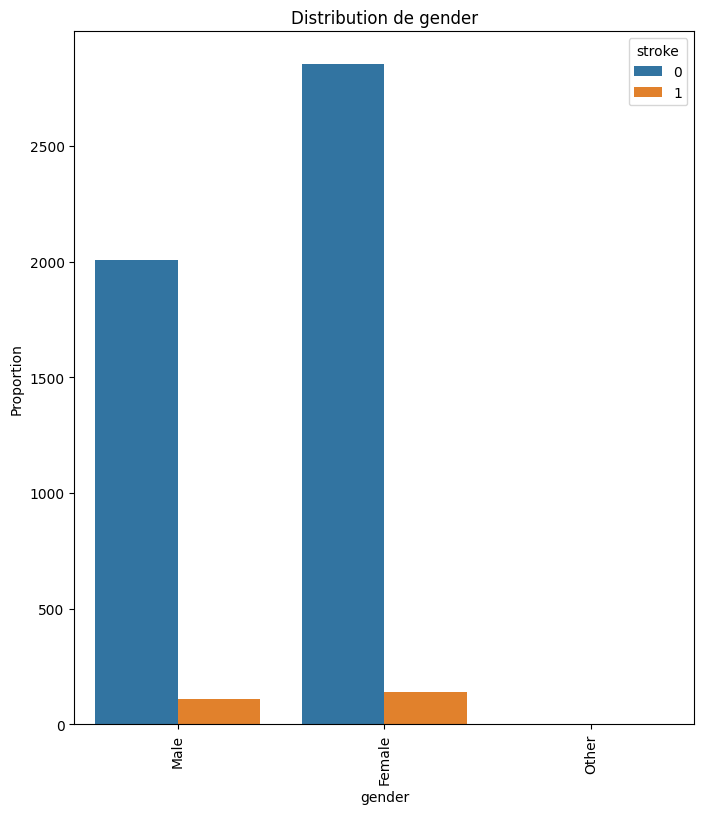

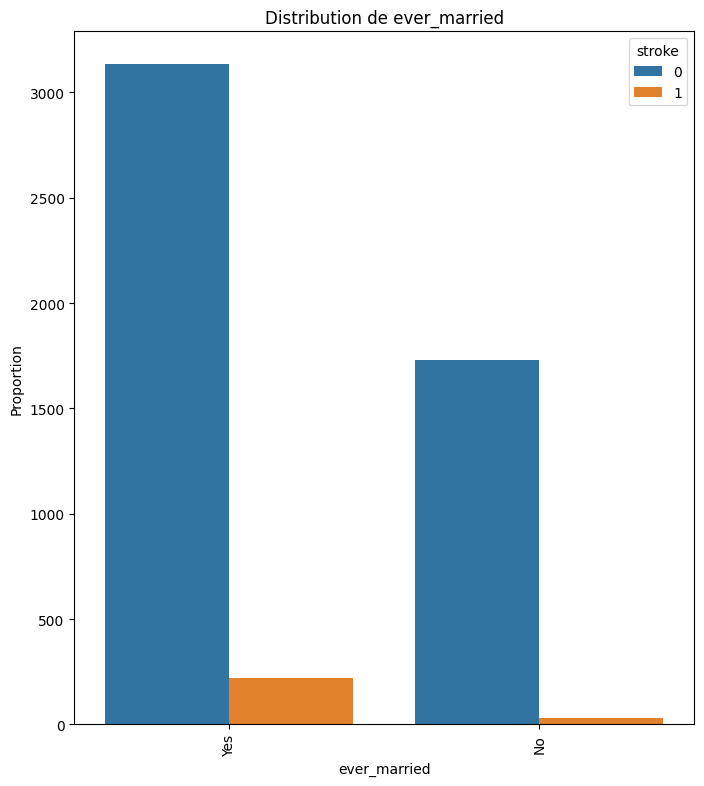

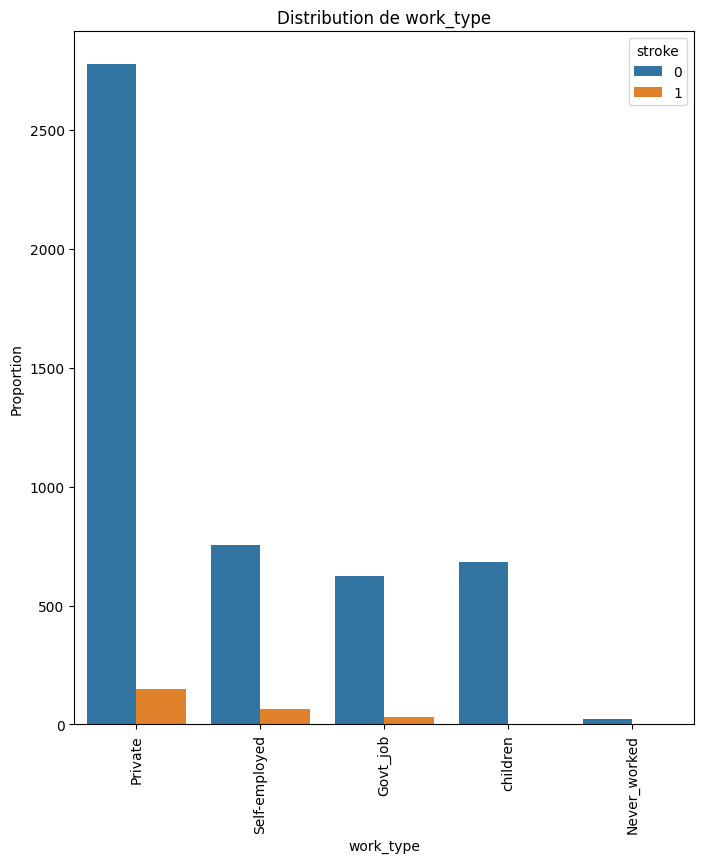

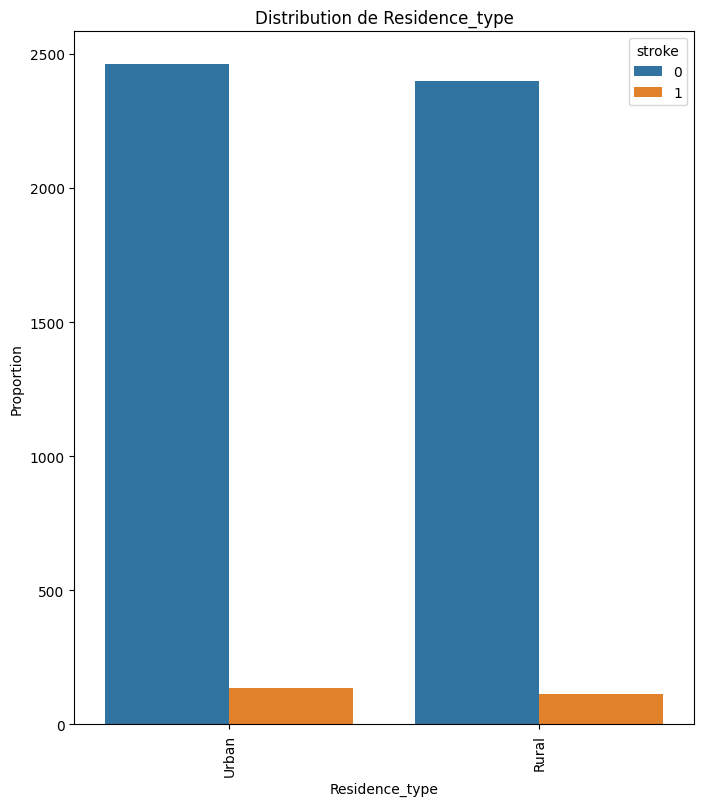

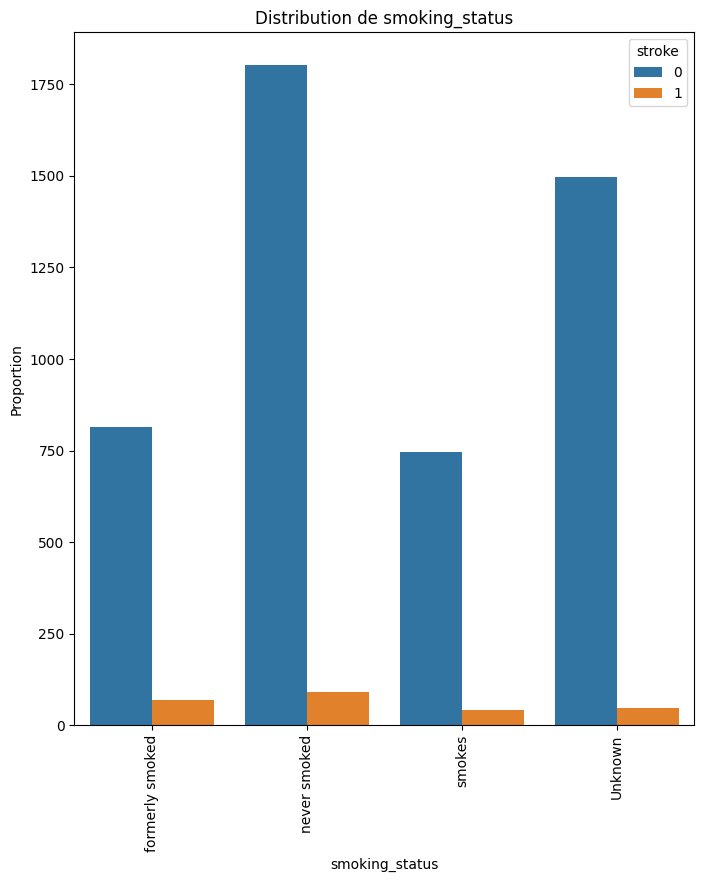

In [25]:
for cols in vars :
  plt.figure(figsize=(8,9))

  sns.countplot(x=cols,data=df,hue="stroke")

  plt.title("Distribution de "+ str(cols))
  plt.xticks(rotation=90)
  plt.ylabel("Proportion")

DETECTION DES VALEURS ABBERANTES

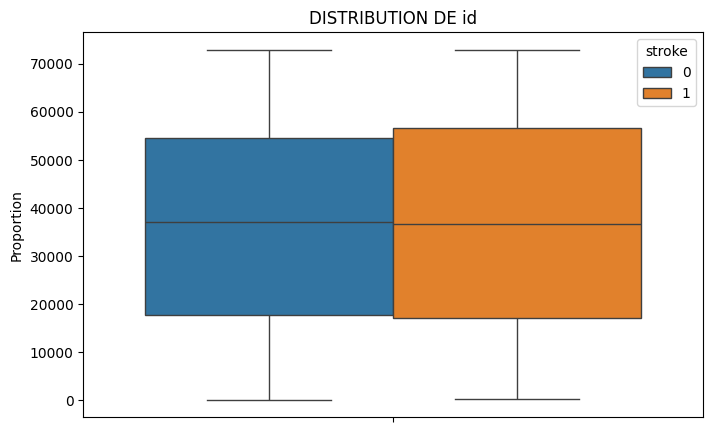

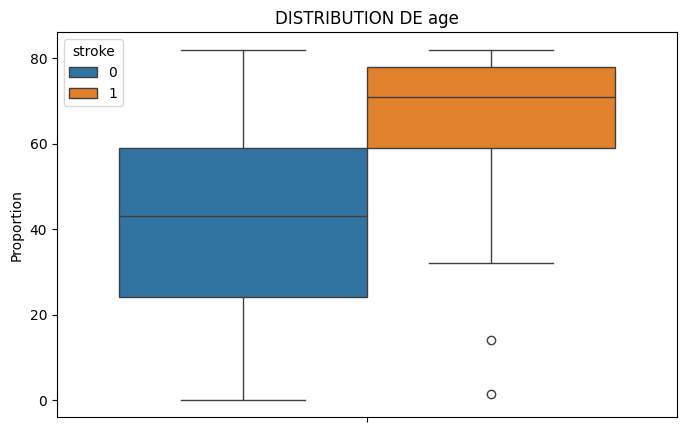

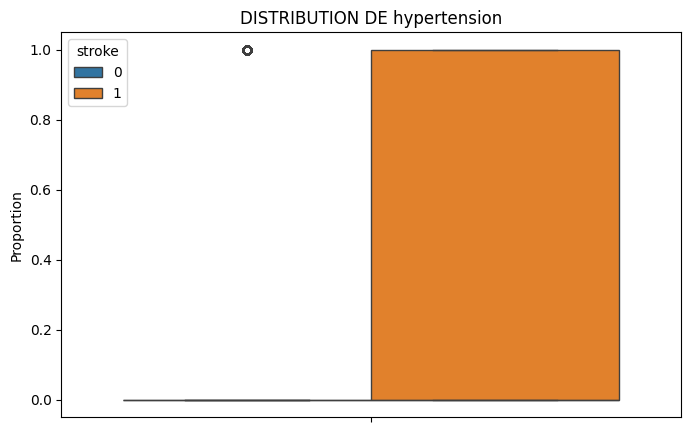

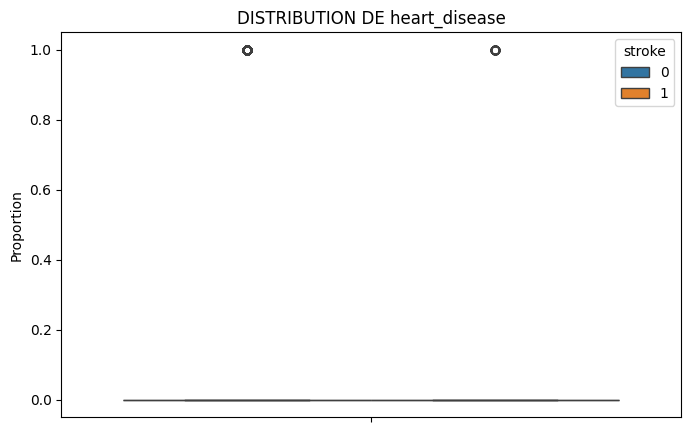

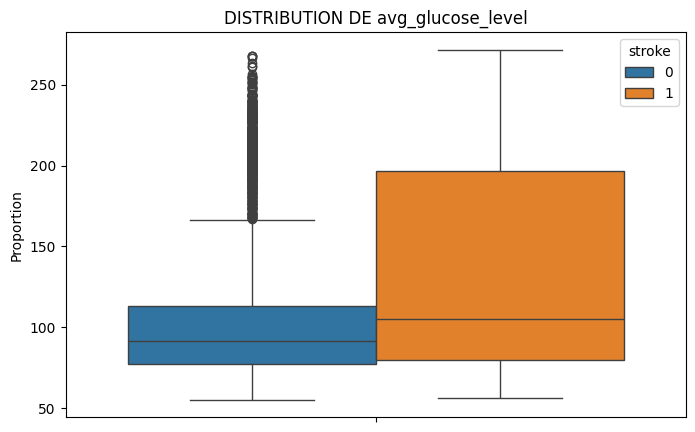

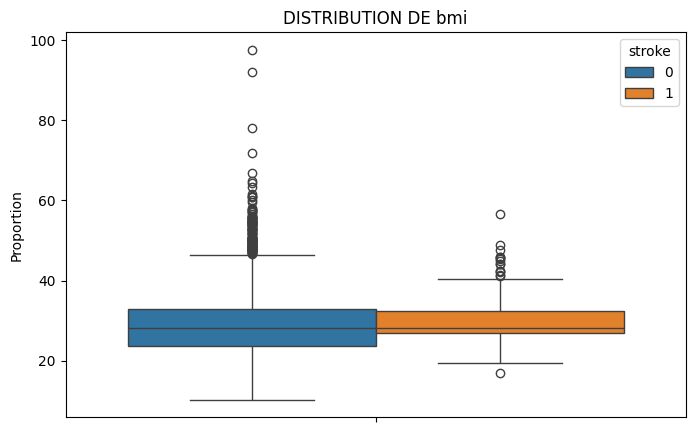

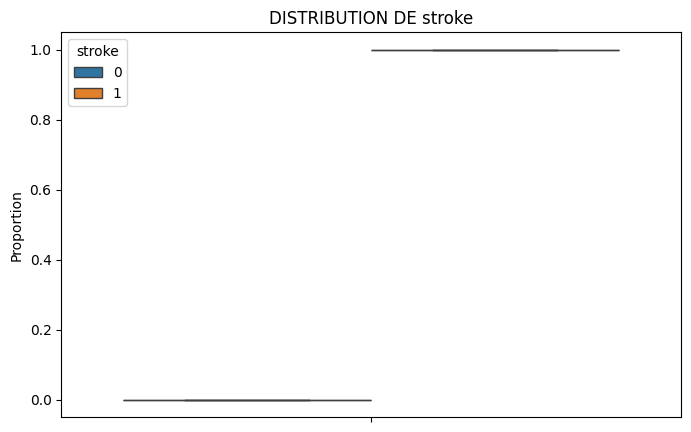

In [26]:
#BOXPLOT

for col in valeurs:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=col ,hue='stroke', data= df)
    plt.title("DISTRIBUTION DE "+ str(col))
    plt.xticks(rotation=90)
    plt.ylabel("Proportion")

In [27]:
#zcore

df_quant = df.drop('id',axis=1).select_dtypes(exclude='O')
col_num = df_quant.columns.tolist()


In [28]:
from scipy import stats
df_zscore= df_quant[(np.abs(stats.zscore(df_quant)) < 2).all(axis=1)]
#pourcentage = (df_zscore.sum()/len(df_zscore))*100
#print(pourcentage)
df_zscore.count()/len(df) * 100

age                  75.342466
hypertension         75.342466
heart_disease        75.342466
avg_glucose_level    75.342466
bmi                  75.342466
stroke               75.342466
dtype: float64

6-ENCODAGE DES VARIABLES CATEGORIELLES

In [29]:
df_qual = df.select_dtypes(include ='O')

In [30]:
df_qual

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [31]:
df_qual['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [32]:
df_qual.loc[df_qual['gender']== 'Other',:] = 'Female'

In [33]:
df_qual.nunique()

gender            2
ever_married      3
work_type         6
Residence_type    3
smoking_status    5
dtype: int64

In [34]:
#UTILISATION DU LABEL ENCODER

#col_cat = df_qual.columns.tolist()
col_cat = ["ever_married","Residence_type","gender"]

lab = LabelEncoder()

#------application de label encodeur pour chaque variables categorielles ayant plus de 2 valeurs uniques
for col in col_cat :
    df_qual[col] = lab.fit_transform(df_qual[col])

In [35]:
df_qual = pd.get_dummies(df_qual).astype(int)

In [36]:
#GROUPAGE DES VARIABLES AYANT BEAUCOUP PLUS DE MODALITES
'''
df_qual['work_type'] = pd.cut(df_qual['work_type'],bins=2,labels=[0,1]) # grouper les regions en 2

df_qual['smoking_status'] = pd.cut(df_qual['smoking_status'],bins=2,labels=[0,1]) # grouper les fumeur en 2 groupes de smoking

'''

"\ndf_qual['work_type'] = pd.cut(df_qual['work_type'],bins=2,labels=[0,1]) # grouper les regions en 2\n\ndf_qual['smoking_status'] = pd.cut(df_qual['smoking_status'],bins=2,labels=[0,1]) # grouper les fumeur en 2 groupes de smoking\n\n"

In [37]:
df_qual

,gender,ever_married,Residence_type,work_type_Female,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Female,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,2,2,0,0,0,1,0,0,0,0,1,0,0
1,0,2,1,0,0,0,0,1,0,0,0,0,1,0
2,1,2,1,0,0,0,1,0,0,0,0,0,1,0
3,0,2,2,0,0,0,1,0,0,0,0,0,0,1
4,0,2,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,2,2,0,0,0,1,0,0,0,0,0,1,0
5106,0,2,2,0,0,0,0,1,0,0,0,0,1,0
5107,0,2,1,0,0,0,0,1,0,0,0,0,1,0
5108,1,2,1,0,0,0,1,0,0,0,0,1,0,0


In [38]:
df1 = df.drop(['gender',	'ever_married',	'work_type',	'Residence_type',	'smoking_status'], axis = 1)
new_data = pd.concat([df1,df_qual],axis=1)
new_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Residence_type,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Female,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,2,2,...,0,0,1,0,0,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,2,1,...,0,0,0,1,0,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,2,1,...,0,0,1,0,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,2,2,...,0,0,1,0,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,2,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,2,2,...,0,0,1,0,0,0,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,2,2,...,0,0,0,1,0,0,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,2,1,...,0,0,0,1,0,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,2,1,...,0,0,1,0,0,0,0,1,0,0


7 MODELISATION

7.1 DIVISION EN TEST ET TRAIN

In [39]:
x = new_data.drop(["id","stroke"],axis=1)
y = new_data['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

VERIFICATION DE L'EQUILIBRE DES CLASSES

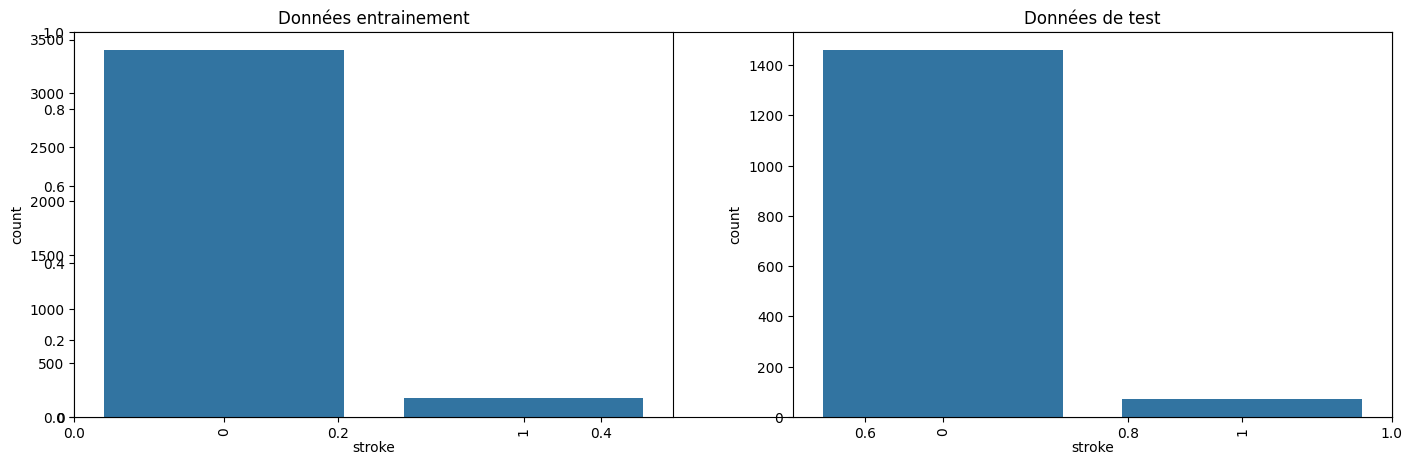

In [40]:
# verification du deséquilibre
plt.subplots(figsize=(17,5))
plt.subplot(121)
sns.countplot(x=y_train).set_title('Données entrainement')
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=y_test).set_title('Données de test')
plt.xticks(rotation=90)
plt.show()

In [41]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

CORRECTION DU DESEQUILIBRE DES CLASSES

In [42]:
# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur les données d'entraînement
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Distribution avant SMOTE:", y_train.value_counts())
print("Distribution après SMOTE:", y_train_resampled.value_counts())


Distribution avant SMOTE: stroke
0    3401
1     176
Name: count, dtype: int64
Distribution après SMOTE: stroke
0    3401
1    3401
Name: count, dtype: int64


NORMALISATION DU JEUX DE DONNEE

In [43]:
scaler = MinMaxScaler()

norm_train= scaler.fit_transform(X_train_resampled)
norm_test = scaler.transform(x_test)

MODELISATION DU JEUX DE DONNEE

A- ARBRE DE DECISION

In [44]:
# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(norm_train, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [45]:
df_norm = pd.DataFrame(norm_train,columns= x_train.columns)
df_norm

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type,work_type_Female,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Female,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.267578,0.0,0.0,0.083965,0.127633,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.951172,1.0,0.0,0.209311,0.257745,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.304199,0.0,0.0,0.064752,0.189591,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.548340,0.0,0.0,0.177813,0.234201,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.658203,0.0,0.0,0.010807,0.200743,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,0.145005,0.0,0.0,0.085925,0.193443,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6798,0.836301,0.0,0.0,0.839334,0.186641,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6799,0.756602,0.0,0.0,0.087074,0.200894,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6800,0.654285,1.0,0.0,0.037664,0.240909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_norm.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender                            0
ever_married                      0
Residence_type                    0
work_type_Female                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Female             0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

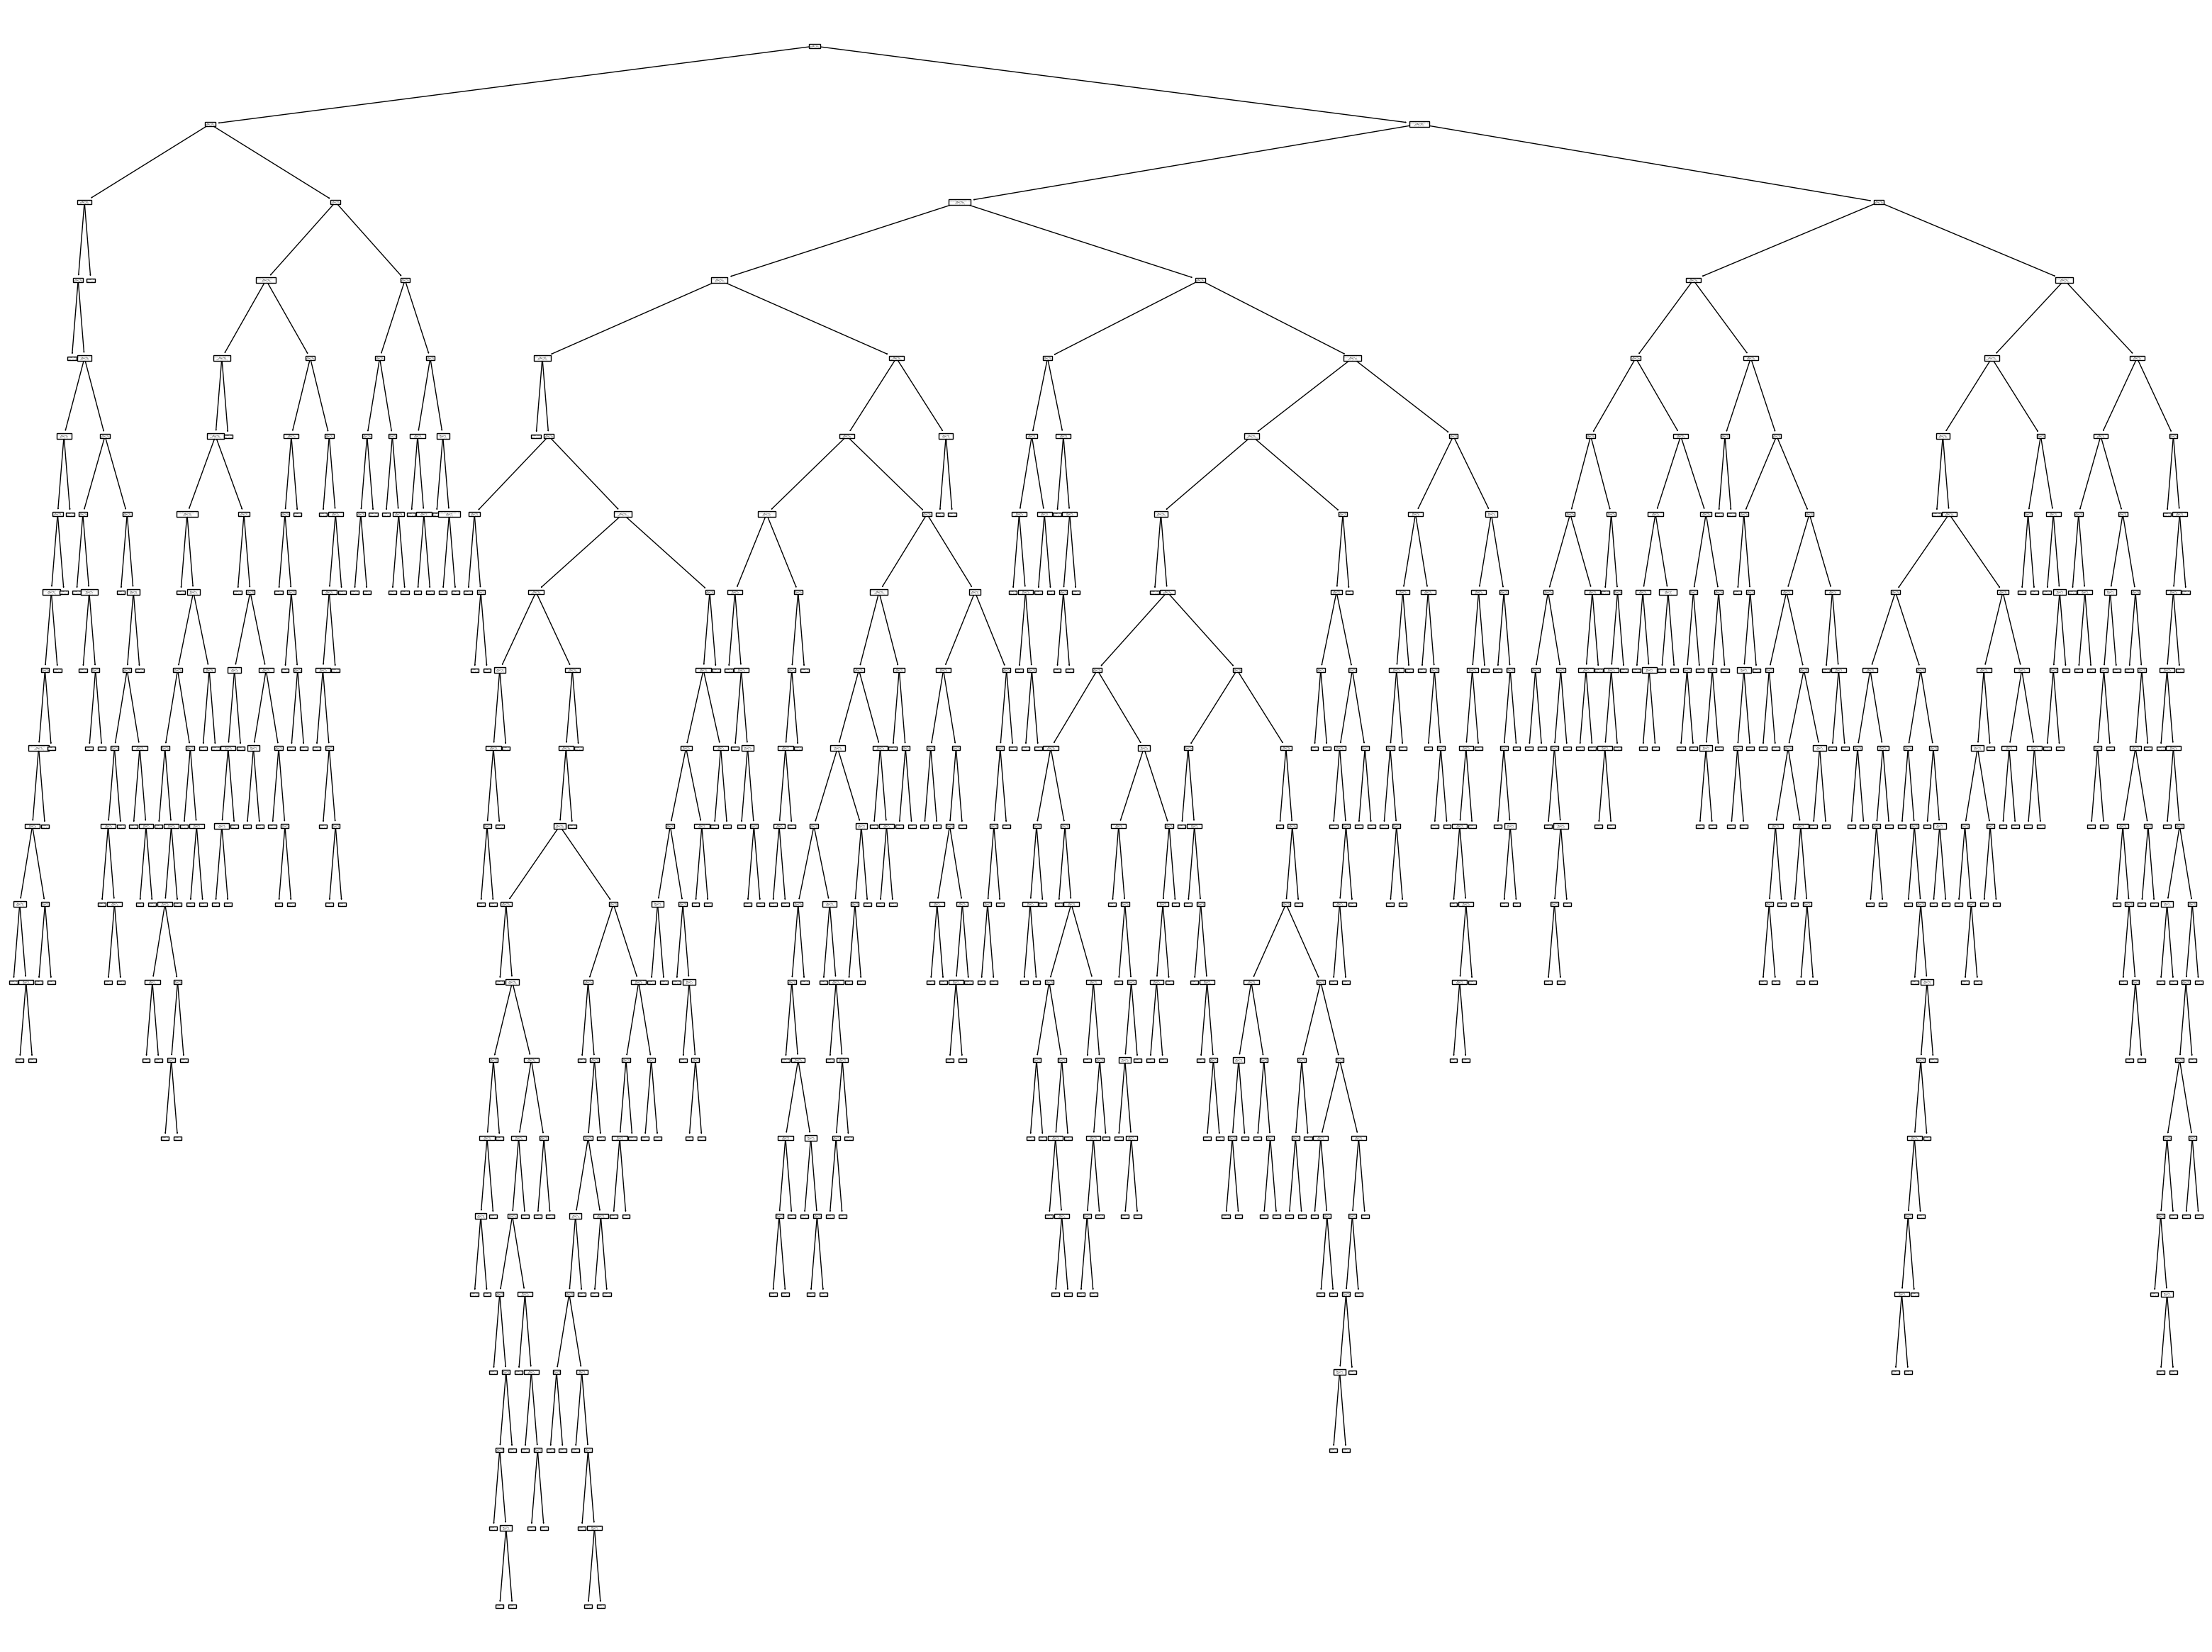

In [47]:
#visualisation de l'arbre
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=x.columns)
plt.show()

In [48]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(norm_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_confusion = confusion_matrix(y_train_resampled, y_train_pred)
train_classification = classification_report(y_train_resampled, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(norm_test)

# Évaluation des performances sur l'ensemble de test
print('Performance sur la base test')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification = classification_report(y_test, y_test_pred)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[3401    0]
 [   0 3401]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3401
           1       1.00      1.00      1.00      3401

    accuracy                           1.00      6802
   macro avg       1.00      1.00      1.00      6802
weighted avg       1.00      1.00      1.00      6802

Performance sur la base test
Test Accuracy :  0.9099804305283757
Test Confusion matrix : 
 [[1385   75]
 [  63   10]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1460
           1       0.12      0.14      0.13        73

    accuracy                           0.91      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.92      0.91      0.91      1533



RANDOM FOREST

In [49]:
# entrainement du model
rf = RandomForestClassifier(random_state=95)

model_rf = rf.fit(norm_train,y_train_resampled)

In [50]:
### Commme nous allons utiliser plusieurs algorithmes, alors nous allons créer une fonction d'evaluation de modele
def evaluation_model(model):
    # prediction
    y_train_pred = model.predict(norm_train)

    y_test_pred = model.predict(norm_test)

    #EVALUATION DE PERFORMANCE

    print("Performance sur les données d'entrainement\n")

    print("Accuracy : ",accuracy_score(y_train_resampled,y_train_pred))
    print("Recall : ",recall_score(y_train_resampled,y_train_pred))
    print("Precision : ",precision_score(y_train_resampled,y_train_pred))

    print("*"*50)

    print("Performance sur les données de test\n")

    print("Accuracy : ",accuracy_score(y_test,y_test_pred))
    print("Recall : ",recall_score(y_test,y_test_pred))
    print("Precision : ",precision_score(y_test,y_test_pred))

    # matrice de confusion
    cm=confusion_matrix(y_test,y_test_pred)
    cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_disp.plot()
    plt.show()

Performance sur les données d'entrainement

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
**************************************************
Performance sur les données de test

Accuracy :  0.9406392694063926
Recall :  0.0684931506849315
Precision :  0.17857142857142858


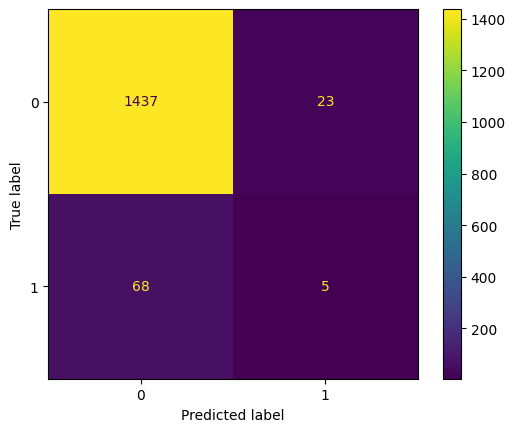

In [51]:
evaluation_model(model_rf)

SVM

In [52]:
model_svm = svm.SVC(kernel='sigmoid')
model_svm.fit(norm_train,y_train_resampled)

SVC(kernel='sigmoid')

In [53]:
print("Le nombre de support vectors pour chaque classe :")
print(model_svm.n_support_)

Le nombre de support vectors pour chaque classe :
[740 741]


In [54]:
print("Les classes manipulées :")
print(model_svm.classes_)

Les classes manipulées :
[0 1]


In [55]:
prediction = model_svm.predict(norm_test)
precision, recall, _, _ = score(y_test, prediction, pos_label=1, average='binary')

In [56]:
accuracy = round((prediction==y_test).sum()/len(prediction), 3)

In [57]:
print(f"Précision : {precision*100:.2f}%")
print(f"Rappel : {recall*100:.2f}%")
print(f"Accuracy : {accuracy*100:.2f}%")

Précision : 4.89%
Rappel : 20.55%
Accuracy : 77.20%


In [62]:
mode_rf = rf.fit(x_train,y_train)

OPTIMISATION DU MODELE DE RANDOM

In [63]:
#Initialisation du modele de Randomforest

rf_o = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf_o, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#ENTRAINEMENT DU MODELE

# Grid Search
grid_search.fit(norm_train, y_train_resampled)

# Meilleurs paramètres trouvés par Grid Search
print("les meilleurs paramettres touvés par Grid Search sont:", grid_search.best_params_)
# Prédictions avec les meilleurs paramètres
best_grid = grid_search.best_estimator_
y_pred_grid = best_grid.predict(norm_test)

# Rapport de classification
print("Classification Report for Grid Search")
print(classification_report(y_test, y_pred_grid))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
les meilleurs paramettres touvés par Grid Search sont: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Grid Search
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1460
           1       0.14      0.04      0.06        73

    accuracy                           0.94      1533
   macro avg       0.55      0.51      0.52      1533
weighted avg       0.92      0.94      0.93      1533



In [64]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], max_features= grid_search.best_params_['max_features'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
rm = random_forest.fit(norm_train, y_train_resampled)

Performance sur les données d'entrainement

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
**************************************************
Performance sur les données de test

Accuracy :  0.9432485322896281
Recall :  0.0821917808219178
Precision :  0.23076923076923078


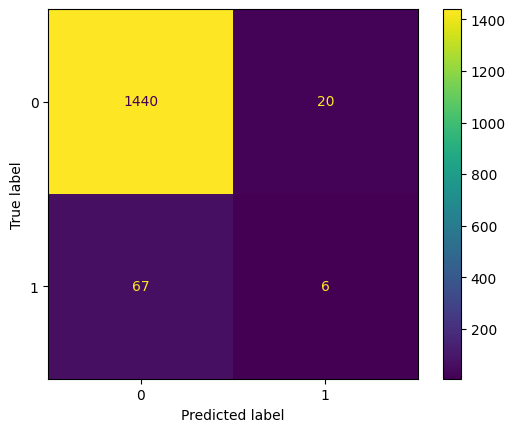

In [74]:
evaluation_model(rm)

Importance des variables :
                          Variable  Importance
0                              age    0.306570
1                avg_glucose_level    0.133011
2                              bmi    0.086918
3      smoking_status_never smoked    0.084817
4           smoking_status_Unknown    0.067580
5   smoking_status_formerly smoked    0.054969
6            smoking_status_smokes    0.052147
7          work_type_Self-employed    0.038778
8                   Residence_type    0.037898
9                work_type_Private    0.032408
10              work_type_Govt_job    0.032259
11                          gender    0.026062
12                    ever_married    0.013711
13              work_type_children    0.012921
14                   heart_disease    0.009886
15                    hypertension    0.009846
16          work_type_Never_worked    0.000218
17                work_type_Female    0.000000
18           smoking_status_Female    0.000000



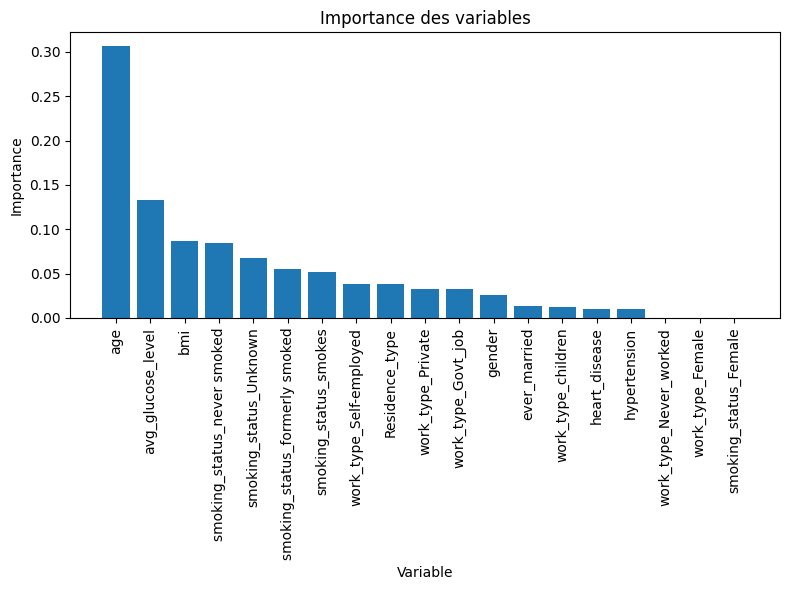

In [82]:
# Obtenir l'importance des variables
importance = rm.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': x.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

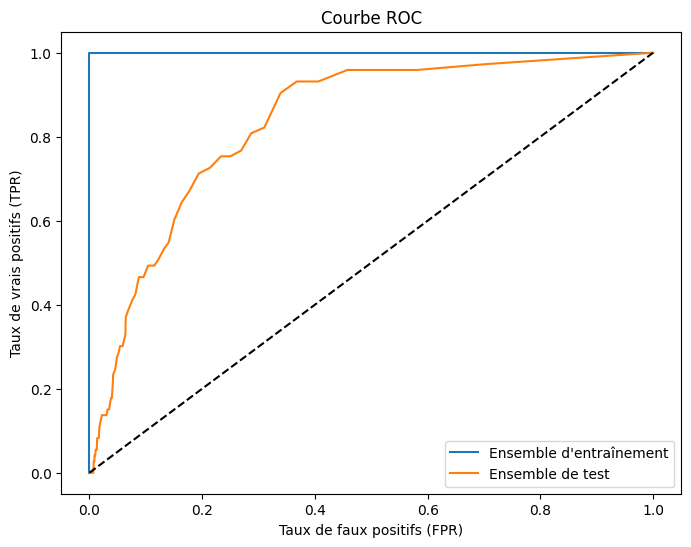

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(norm_train)[:, 1]
y_test_prob = random_forest.predict_proba(norm_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


MODELISATION AVEC LES VARAIBLES LES PLUS IMPORTANTES

Nous allons à présent enregister un modèle avec les variables les plus importantes pour faciliter le déploiement de notre projet. 

In [86]:
importance_df.loc[importance_df['Variable']=='work_type_Self-employed','Variable'] = 'work_type_Self_employed'

In [89]:
#Selectionner les variables qui ont un seuil supérieur a 0.045

seuil = 0.045

base_importance = importance_df[importance_df['Importance'] > seuil]

list_imp = base_importance['Variable'].to_list()
list_imp

['age',
 'avg_glucose_level',
 'bmi',
 'smoking_status_never smoked',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_smokes']

In [88]:
base_finale = new_data.copy()

In [90]:
base_finale = base_finale[list_imp]

In [93]:
base_finale['stroke'] = new_data['stroke']
base_finale

,age,avg_glucose_level,bmi,smoking_status_never smoked,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,67.0,228.69,36.6,0,0,1,0,1
1,61.0,202.21,28.1,1,0,0,0,1
2,80.0,105.92,32.5,1,0,0,0,1
3,49.0,171.23,34.4,0,0,0,1,1
4,79.0,174.12,24.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.1,1,0,0,0,0
5106,81.0,125.20,40.0,1,0,0,0,0
5107,35.0,82.99,30.6,1,0,0,0,0
5108,51.0,166.29,25.6,0,0,1,0,0


DIVISION DU JEUX DE DONNEE

In [94]:
x = base_finale.drop('stroke',axis=1)
y = base_finale['stroke']

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

#equilibre des classe
X_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

#Normalisation des variables équilibrées
x_train_norm = scaler.fit_transform(X_train_resampled)
x_test_norm = scaler.transform(x_test)



UTILISONS LE MODELE DE RANDOMFOREST

In [111]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], max_features= grid_search.best_params_['max_features'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
rm = random_forest.fit(x_train_norm,y_train_resampled)

In [112]:
### Commme nous allons utiliser plusieurs algorithmes, alors nous allons créer une fonction d'evaluation de modele
def evaluation_model(model):
    # prediction
    y_train_pred = model.predict(x_train_norm)

    y_test_pred = model.predict(x_test_norm)

    #EVALUATION DE PERFORMANCE

    print("Performance sur les données d'entrainement\n")

    print("Accuracy : ",accuracy_score(y_train_resampled,y_train_pred))
    print("Recall : ",recall_score(y_train_resampled,y_train_pred))
    print("Precision : ",precision_score(y_train_resampled,y_train_pred))

    print("*"*50)

    print("Performance sur les données de test\n")

    print("Accuracy : ",accuracy_score(y_test,y_test_pred))
    print("Recall : ",recall_score(y_test,y_test_pred))
    print("Precision : ",precision_score(y_test,y_test_pred))

    # matrice de confusion
    cm=confusion_matrix(y_test,y_test_pred)
    cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_disp.plot()
    plt.show()

Performance sur les données d'entrainement

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
**************************************************
Performance sur les données de test

Accuracy :  0.9262883235485975
Recall :  0.1935483870967742
Precision :  0.16


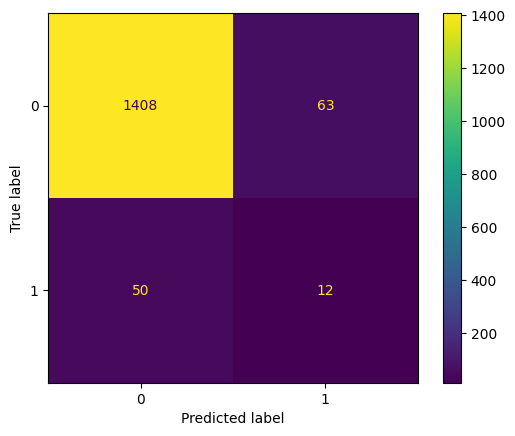

In [109]:
evaluation_model(rm)

COURBE ROC

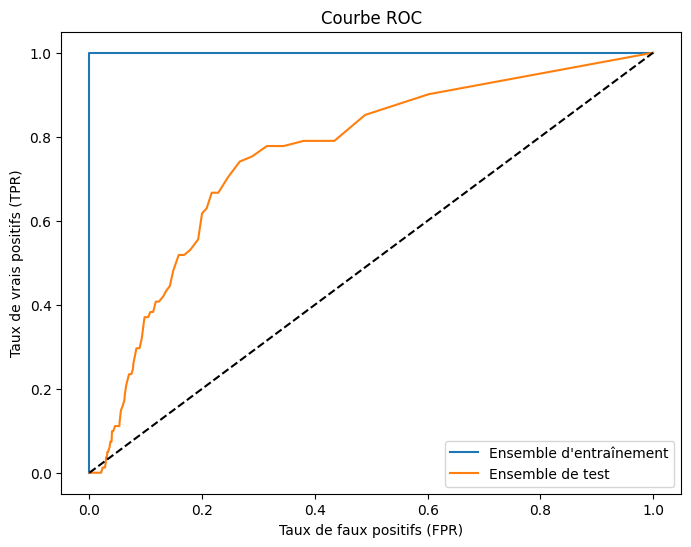

In [116]:
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(x_train_norm)[:, 1]
y_test_prob = random_forest.predict_proba(x_test_norm)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()


In [117]:
from sklearn.metrics import roc_auc_score
# Calcul de l'AUC
#auc_score_entrain = roc_auc_score(y_train_resampled, y_train_prob)

auc_score_test = roc_auc_score(y_test, y_test_prob)



# Affichage du résultat
#print(f"AUC Score pour le modèle de Random Forest sur les donneesd'entrainement : {auc_score_entrain}")
print(f"AUC Score pour le modèle de Random Forest sur les donnees de test : {auc_score_test}")

AUC Score pour le modèle de Random Forest sur les donnees de test : 0.7593357820630547


In [118]:
import pickle as pkl
with open("model_accident_Vasculaire.pkl", 'wb') as file:
    pkl.dump(rm, file)


In [73]:
with open("scaler_vas.pkl", 'wb') as file:
    pkl.dump(scaler, file)
